# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
from scipy import stats 
import numpy as np

In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [34]:
from scipy.stats import ttest_1samp , ttest_ind
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
# calculate mean of both samples and alsco check SD
#GPU1
meanGPU1 = round(GPU1.mean(),2)
print ("Mean of processing time for GPU-1: ",meanGPU1)
#GPU2
meanGPU2 = round(GPU2.mean(),2)
print ("Mean of processing time for GPU-2: ",meanGPU2)

sdGPU1 = round(GPU1.std(),2)
print ("SD of processing time for GPU-1: ",sdGPU1)

sdGPU2 = round(GPU2.std(),2)
print ("SD of processing time for GPU-2: ",sdGPU2)


Mean of processing time for GPU-1:  10.33
Mean of processing time for GPU-2:  11.47
SD of processing time for GPU-1:  1.14
SD of processing time for GPU-2:  1.15


In [28]:
# H0 : mu = 0
# Ha : mu <> 0

In [53]:
t_statistic, p_value = ttest_1samp(GPU1, 0)
print(t_statistic, p_value)

34.056241516158195 7.228892044970457e-15


In [51]:
# Consider level of Significance = 5 %
# So p value is 7.228892044970457e-15 which is significantly lower than 0.05
# So reject null hypothesis
# So test suggests that population mean is not zero 

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [29]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2)
print (t_statistic,p_value)

-2.627629513471839 0.013794282041452725


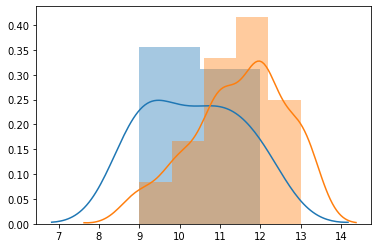

In [42]:
sns.distplot(GPU1)
sns.distplot(GPU2)

In [43]:
# @ 5 % level of Significance
# p value (0.0137) < Level of Significance (0.05)
# So REJECT Null hypothises
# So the test shows there there is significant difference between 2 data sets namely GPU1 and GPU2

#Addtional observation based on histogram shown above : The distributions looks different and central
 # tendency of each distribution is not around same value

## Question 3

He is trying a third GPU - GPU3.

In [55]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [50]:
print (GPU3.mean())

11.066666666666666


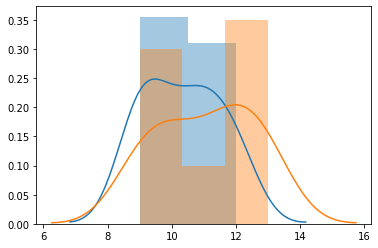

In [56]:
sns.distplot(GPU1)
sns.distplot(GPU3)

In [57]:
t_statistic1, p_value1  =  stats.ttest_ind(GPU1,GPU3)
print (t_statistic1,p_value1)

-1.4988943759093303 0.14509210993138993


In [ ]:
# @ 5 % level of Significance
# p value (0.145) > Level of Significance (0.05)
# So we CAN NOT REJECT Null hypothises
# So data does not give sufficient evidence to conclude that there is
  #significant difference between 2 data sets namely GPU1 and GPU3 and so we can not conclude that
  #these 2 sets come from different population
    
#Addtional observation based on histogram shown above : The distributions looks similar and central 

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [68]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [72]:
from scipy.stats import levene
import pandas as pd

In [73]:
#lets put the data into dataframe
df1            = pd.DataFrame({'Experiment': 'e1', 'Results':e1})
df2            = pd.DataFrame({'Experiment': 'e2', 'Results':e2})
df3            = pd.DataFrame({'Experiment': 'e3', 'Results':e3})

exp_results_df = pd.DataFrame()

exp_results_df = exp_results_df.append(df1) 
exp_results_df = exp_results_df.append(df2) 
exp_results_df = exp_results_df.append(df3) 

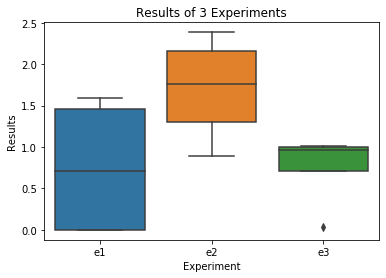

In [75]:
sns.boxplot(x = "Experiment", y = "Results", data = exp_results_df)
plt.title('Results of 3 Experiments')
plt.show()

In [ ]:
#The above box plot chart can be used to understand, at high level, distribution of data sets

In [69]:
statistic, pval = levene(e1,e2,e3)

In [70]:
print (statistic,pval)

2.6741725711150446 0.12259792666001798


In [ ]:
# p value (1.22) > Level of significance (0.05)...this implies that there is no significant evidence which suggest 
# that there is significant difference of results between 3 different experiments

In [78]:
# Lets check with other test - F test

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Results ~ Experiment', data = exp_results_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq   df         F    PR(>F)
Experiment  2.399066  2.0  2.513576  0.135746
Residual    4.294994  9.0       NaN       NaN


In [ ]:
# The Levene's test givens p-value = 0.1225 and F-test gives p-value = 0.1357

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [81]:
from scipy.stats import f_oneway

stat1, pval1 = f_oneway(e1,e2,e3)
print(stat1,pval1)

2.51357622845924 0.13574644501798466


In [ ]:
# p-value = 0.1357  > level of significance (0.05) suggestes that there is no significant evidence 
# that results of 3 experiment are from different population

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

answer here

Type I Error : This is probability of rejecting NULL Hypothesis when it should not have been rejected i.e.
               Incorrectly rejecting null hypothesis
Type II Error : This is probability of not rejecting null hypothesis when it should have been rejected

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


answer here

Null Hypothesis : Mean waiting time (mu) is 4.5 minutes
Alternate Hypothesis : Mean waiting time (mu) is not equal to 4.5 minutes

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [127]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [132]:
from scipy.stats import chi2_contingency

In [140]:
chi_sq_Stat, p_value, dof, exp_freq = stats.chi2_contingency(dice)

print ("chi2 stat : {0}\n p-value : {1}\n Degree of Freedom : {2}".format(chi_sq_Stat,p_value,dof))

chi2 stat : 23.315671914716496
 p-value : 0.07766367301496693
 Degree of Freedom : 15


In [145]:
from scipy.stats import chi2

prob = 0.99
critical = chi2.ppf(prob, dof)
if abs(chi_sq_Stat) >= critical:
    print('Dependent (reject H0)')
else :
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [147]:
# interpret p-value
alpha = 1.0 - prob
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [153]:
from scipy.stats import zscore
z_scores = zscore(dice)

In [155]:
#Below are the zscores of dice data
z_scores

array([[-0.46291005, -0.18884739, -1.83711731,  1.44115338],
       [ 1.38873015, -0.64208114,  1.22474487,  0.        ],
       [ 0.9258201 ,  0.7176201 ,  0.61237244, -1.44115338],
       [-0.9258201 ,  1.62408759,  0.61237244, -0.96076892],
       [-1.38873015,  0.03776948,  0.        ,  0.        ],
       [ 0.46291005, -1.54854863, -0.61237244,  0.96076892]])

In [158]:
#Below are the p-values of above z scores
print(stats.norm.cdf(z_scores))

[[0.32171442 0.42510621 0.03309629 0.92522932]
 [0.91754259 0.26041025 0.88966432 0.5       ]
 [0.82273026 0.76350422 0.72985431 0.07477068]
 [0.17726974 0.94782144 0.72985431 0.16833418]
 [0.08245741 0.51506426 0.5        0.5       ]
 [0.67828558 0.06074513 0.27014569 0.83166582]]


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [122]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [125]:
# Lest calculate difference between weight before and after drug is given
# This is paired sample test as the 'Observation' before and after is sample entity i.e. same patient/person
# Null Hypothesis = No change in mean weight
# Alternate Hypothesis = Change in mean weight

In [126]:
t_val,p_val = ttest_ind(before, after)
print(t_val, p_val)

0.7344329125429158 0.462857453141966


In [137]:
# Level of significance = 5 %
# The p-value is greater than 0.05 and so we fail to reject null hypothesis and so there is no significant evidence
# in data which shows that drug works i.e. there is no significant evidence which shows that weight is lost after
# taking drug

# Also the below plots show that there is no significant change in the two distributions 

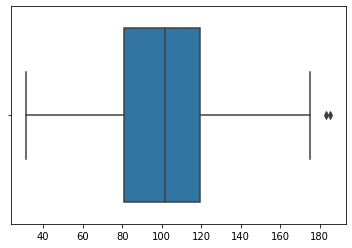

In [98]:
# Lets plot the ditribution of before and after
sns.boxplot(before)
plt.show()

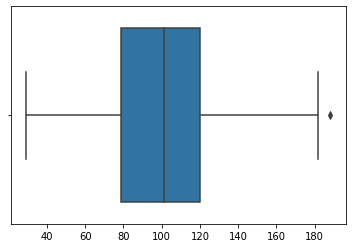

In [99]:
sns.boxplot(after)
plt.show()

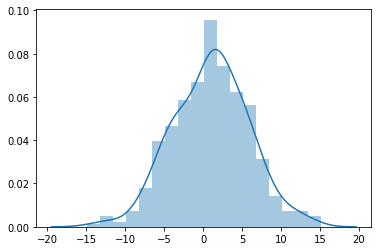

In [103]:
sns.distplot(before - after)

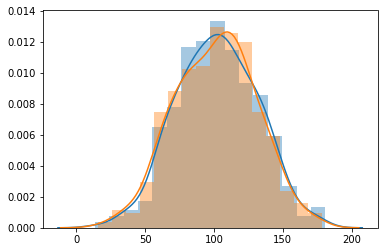

In [121]:
sns.distplot(before)
sns.distplot(after)